In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def markedDepenenceLambda(beta,value):
    p=-(np.log(1-value))/beta
    return p


def markedDepenenceLambda1(mu,sd,value):
    p=np.sqrt(-2*np.log(value*sd*np.sqrt(2*np.pi)))*sd+mu
    return p

def markFunction(A,alpha,mark):
    return A*np.exp(alpha*mark)

def function_kernel(k,theta,tau,c):
    kernel=k*(tau+c)**(-1-theta)
    return kernel

def function_kernel1(theta,tau):
    kernel=(np.exp(-theta*tau))
    return kernel


def simu_univariateMarked(mu,theta,k,mu1,sd,beta,T):    
    lambda_int=mu
    s=0
    tau=[]
    lambda_val=[]
    l2=[]  
    g_x=np.random.uniform(0.0,1.0,1)[0]
    marks=markedDepenenceLambda(beta,g_x)
    lambda_s=mu
    while s<T:
        sum1=0
        new_tau = np.array(tau[::-1])
        l3=np.array(l2[::-1])
        sum1=(function_kernel1(theta,s-new_tau[0:])*l3[0:]).sum()
        lambda_ = lambda_int + sum1

        u=np.random.uniform(0,1,1)[0]
        w=-np.log(u)/lambda_
        s=s+w
        d=np.random.uniform(0,1,1)[0]
        sum1=(function_kernel1(theta,s-new_tau[0:])*l3[0:]).sum()
        
        lambda_s = lambda_int +  sum1
        
        if (d*lambda_<=lambda_s):
            t=s
            tau.append(t)
            g_x=np.random.uniform(0.0,1.0,1)[0]
            marks=markedDepenenceLambda(beta,g_x)
            l2.append(marks)
    return np.array(tau[:-1]),np.array(np.array(l2[:-1]))

mu,theta,k = 0.5,1.0,1.0
sd=0.1
mu1=1
beta=1.2
a=0.9
t,marks=simu_univariateMarked(mu,theta,k,mu1,sd,beta,200)
len(t),len(marks),marks,t
#np.mean(marks),1/1.2,np.std(marks),np.sqrt(1/1.2**2)
#np.save("marksHawkes.npy",{'timestamps':t, 'marks':marks})



(714,
 714,
 array([2.99877883e-01, 1.73836553e-01, 5.76714717e-02, 3.00320824e-01,
        1.88920935e+00, 8.69422374e-01, 1.02732101e-01, 9.57531437e-01,
        3.71666485e-01, 6.09390399e-01, 1.25281571e-02, 2.32437705e-01,
        8.14247064e-01, 1.82074905e-01, 8.18172911e-01, 5.11294191e-01,
        9.23444610e-01, 4.87458941e-01, 1.31816152e-01, 3.02736505e-01,
        7.98118522e-02, 4.97867998e-01, 3.09058032e-01, 5.71736571e-01,
        1.58331366e+00, 3.55725726e-02, 1.75325586e+00, 1.09502507e-01,
        6.18145791e-02, 6.50073614e-01, 4.62073776e-01, 1.39760209e+00,
        4.29832604e-01, 2.05826073e-01, 1.79896207e-02, 1.99696110e-01,
        1.09567884e+00, 2.95999318e-02, 1.74273521e-01, 2.23723170e-01,
        9.56146613e-03, 2.54543134e+00, 1.06065108e+00, 8.09178532e-01,
        4.27998348e-02, 8.60282002e-01, 1.97711636e-02, 6.95460805e-01,
        1.32632935e+00, 1.18886874e-01, 6.97721801e-03, 8.29812131e-01,
        5.21481285e-01, 4.67226533e-01, 1.76621227e-

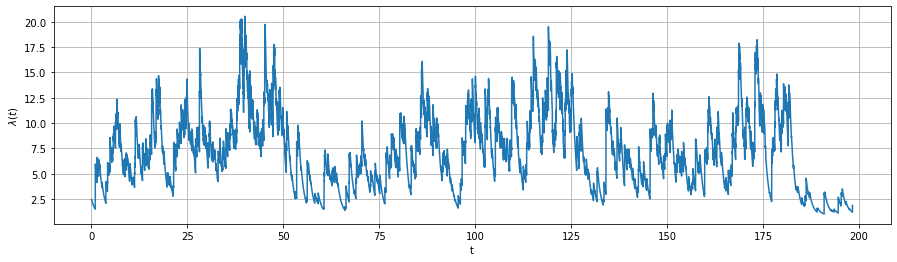

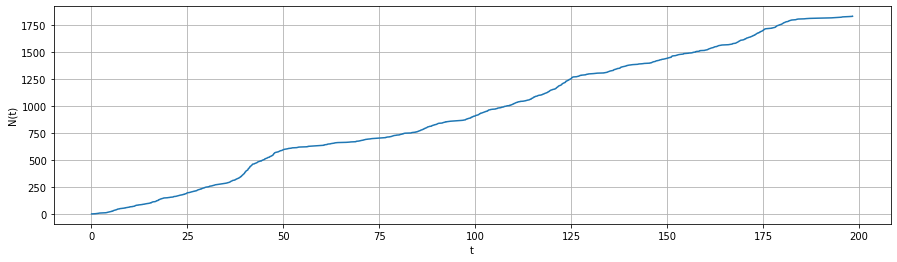

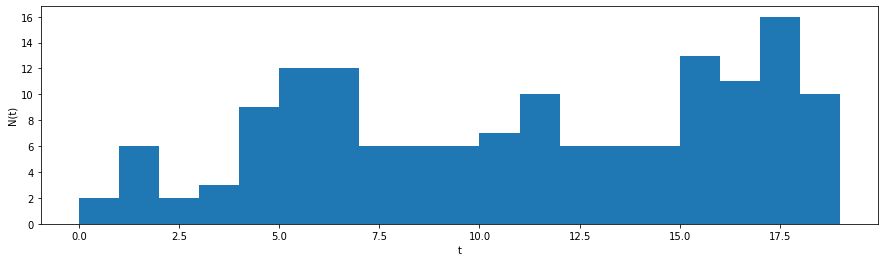

In [21]:
def plotLambdas(t,marks):

    plotrange=len(t)
    dx=0.01
    lambda_value=[]
    time_intervals=[]
    l2=marks
    for j in range(1,plotrange):
            
        new_temp=np.linspace(t[j-1],t[j],20)
        #decayfactor=np.zeros(len(new_temp))
        li=max(0,j-20)
        temp=new_temp.reshape(-1,1)-t[li:j]
            
        for k1 in range(len(temp)):
            decayfactor=mu+np.sum((function_kernel1(theta,temp[k1])*l2[li:j]))
            lambda_value.append(decayfactor)
        time_intervals.append(new_temp)
    time_intervals=(np.array(time_intervals)).reshape(-1)
    lambda_value=(np.array(lambda_value)).reshape(-1)
    plt.figure(figsize=(15,4))
    plt.plot(time_intervals,lambda_value)
    plt.xlabel("t")
    plt.ylabel("$\lambda(t)$")
    plt.grid()
    plt.pause(0.005)
    return
plotLambdas(t,marks)
component_No= np.arange(0,len(t),1)
plt.figure(figsize=(15,4))
plt.plot(t,(component_No))
plt.xlabel("t")
plt.ylabel("N(t)")
plt.grid()
plt.pause(0.005)
plt.figure(figsize=(15,4))
plt.hist(t,bins=np.arange(0,20,1))
plt.xlabel("t")
plt.ylabel("N(t)")
plt.pause(0.005)



0.8333333333333334


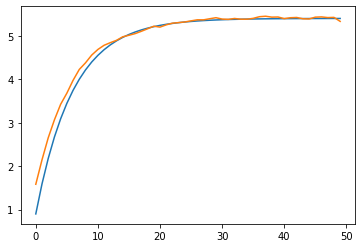

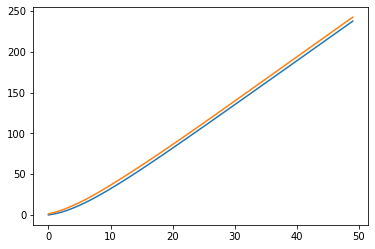

In [5]:
simulation_count=10000
TimPoSim=50
LambdaT=np.zeros((simulation_count,TimPoSim))
numberofCom=np.zeros((simulation_count,TimPoSim))
for j in range(simulation_count):
    t1,mark1=simu_univariateMarked(mu,theta,k,mu1,sd,beta,TimPoSim)
    lambdas=[]
    for i in range(1,TimPoSim+1,1):
        decayfactor=mu+np.sum((function_kernel1(k,theta,i-t1[t1<i])*mark1[t1<i]))
        LambdaT[j,i-1]=decayfactor
        comp=len(t1[t1<i])
        numberofCom[j,i-1]=comp

x=np.arange(0,30,0.1)
#plt.plot(x,1-np.exp(-1.2*x))

mu1=1/beta
mu2=2/beta**2
k1=theta-mu1
t=np.arange(0,TimPoSim,1)
print(1/beta)
expectation=mu*theta/k1+(mu-mu*theta/k1)*np.exp(-k1*t)
variance=mu2/k1*((mu*theta/(2*k1)-mu)*np.exp(-2*k1*t) + (mu-mu*theta/k1)*np.exp(-k1*t)+mu*theta/(2*k1))
ExpN=mu*theta/k1*t+1/k1*(mu-mu*theta/k1)*(1-np.exp(-k1*t))
E=[]
N=[]
for k in range(1,TimPoSim+1,1):
    E.append(np.mean(LambdaT[:,k-1]))
    N.append(np.mean(numberofCom[:,k-1]))
plt.plot(t,expectation)
plt.plot(t,E)

plt.show()

plt.plot(t,ExpN)
plt.plot(t,N)

In [3]:
print("marked","mean Lambda Theortical",mu/(1-1/2), "mean Marks",np.mean(marks), "mean Lambda Actual",np.mean(LambdaT))


 


NameError: name 'LambdaT' is not defined

In [5]:
t,marks=simu_univariateMarked(mu,theta,k,mu1,sd,beta,400)
print("charateristics of the data",max(t),len(t))

def loglikelihood(para,marks):
    theta=para[0]
    beta =para[1]
    mu=para[2]
    tend = t[-1]-t
    ll=mu*(t[-1]-t[0])
    ll+=((1-np.exp(-theta*tend))/theta*marks).sum()
    #print('exp',ll)
    for i in range(0,len(t),1):
        temp = t[i]-t[0:i]
        markTemp=marks[0:i]
        logLam = -np.log(mu+(markTemp*np.exp(-theta*temp)).sum())
        ll = ll+logLam
    ll-=(np.log(beta*np.exp(-beta*marks))).sum()
    return ll


def gradientll(para,t,marks,iArray):
   
    theta =para[0]
    beta=para[1]
    mu=para[2]
    tend = t[-1]-t
    grad = np.array([0.0, 0.0, 0.0])
    for i  in np.nditer(iArray):
        if i>0:
            temp = t[i]-t[0:i]
            markTemp=marks[0:i]
            decayFactor = np.exp(-theta*temp)*markTemp
            lam = mu+sum(decayFactor)
    
            fac1 = np.exp(-theta*tend[i])
            fac2= (marks[i]/theta**2)*(-fac1*tend[i]*theta-(1-fac1))
            fac3=1/(beta*np.exp(-beta*marks[i]))
            
            grad[0]=grad[0]+(1/lam)*((temp*decayFactor).sum())+fac2
            grad[1]= grad[1]-fac3*np.exp(-beta*marks[i])*(-beta*marks[i]+1)
            grad[2]=grad[2]+t[i]-t[i-1]-1/lam
            
        
    return grad/len(iArray)

def sgdHawkes(para,t,marks,lr):
    global bestpara,bestll

    theta =para[0]
    beta=para[1]
    mu=para[2]
    lr =lr
    beta_1 = 0.9
    beta_2 =0.999
    epsilon = 1e-8
    count = 0
    bestll = 1e8
    bestpara = np.array([0.,0.,0.])
    m_t = np.array([0.,0.,0.])
    v_t = np.array([0.,0.,0.])
    print(loglikelihood(para,marks))
    for epochs in range(1,50+1,1):
        
        rsample = np.random.choice(len(t),max(len(t),len(t)))
        for i in range(1,len(rsample),20):
            count=count+1 
            grad = gradientll(para,t,marks,rsample[i:i+20])
            
            m_t = beta_1*m_t + (1-beta_1)*grad	#updates the moving averages of the gradient
            v_t = beta_2*v_t + (1-beta_2)*(grad*grad)	#updates the moving averages of the squared gradient
            m_cap = m_t/(1-(beta_1**count))		#calculates the bias-corrected estimates
            v_cap = v_t/(1-(beta_2**count))		#calculates the bias-corrected estimates
            para = para-(lr*m_cap)/(np.sqrt(v_cap)+epsilon)
            
        error=loglikelihood(para,marks)
        bestpara = para*(bestll>=error)+bestpara*(bestll<error)
        para = np.maximum(para,0.01)
        bestll = min(bestll,error)
            
        print(epochs,error,bestll,para,bestpara)   #iteration, -loglikelihood, bestloglik, currentpara, bestpara 
    return bestpara
    
para=np.random.uniform(0,1,3)
lr=0.005
print("orginal LL",loglikelihood([theta,beta,mu],marks))
sgdHawkes(para,t,marks,lr)

charateristics of the data 399.5420198395743 1050
orginal LL 343.6824415113899
1637.993079902107
1 835.3287604957708 835.3287604957708 [0.90707496 0.37261365 0.49997016] [0.90707496 0.37261365 0.49997016]
2 613.4161711505025 613.4161711505025 [0.98269189 0.51738614 0.45053263] [0.98269189 0.51738614 0.45053263]
3 510.3882777734499 510.3882777734499 [1.02111449 0.6264133  0.41468116] [1.02111449 0.6264133  0.41468116]
4 447.9139046330181 447.9139046330181 [1.01753072 0.72019507 0.43621585] [1.01753072 0.72019507 0.43621585]
5 414.40589184590317 414.40589184590317 [1.05329003 0.78941769 0.44190716] [1.05329003 0.78941769 0.44190716]
6 391.7053337308962 391.7053337308962 [1.06870347 0.84920064 0.48136148] [1.06870347 0.84920064 0.48136148]
7 375.515111025053 375.515111025053 [1.06473763 0.90266075 0.47382588] [1.06473763 0.90266075 0.47382588]
8 361.4915981789825 361.4915981789825 [0.99951583 0.96060718 0.44574859] [0.99951583 0.96060718 0.44574859]
9 354.752695844135 354.752695844135 [1.

array([1.00754442, 1.16481343, 0.43567389])

In [8]:
t,marks=simu_univariateMarked(mu,theta,k,mu1,sd,beta,10)
#marks=marks*2

from tick.hawkes import SimuHawkes, HawkesKernelPowerLaw, HawkesConditionalLaw
from tick.plot import plot_hawkes_kernels
j1=np.ones(len(t))*0.001
j2=j1=np.ones(len(t))*4
marked_components=[0.001,4]
e = HawkesConditionalLaw(claw_method="log", delta_lag=0.1, min_lag=0.002,
                         max_lag=200, quad_method="log", n_quad=200,
                         min_support=0.002, max_support=100, n_threads=1)


jk=zip(t,marks)
e.incremental_fit([list(jk)],compute=True)
e.compute()
tk=np.arange(0,5,0.1)
kernel0=e.get_kernel_values(0,0,tk)
plt.plot(tk,kernel0)
plt.plot(tk,np.exp(-theta*tk))
print(e.mark_functions)
print(tk,kernel0,e.baseline)


ValueError: Expecting a dense numpy array

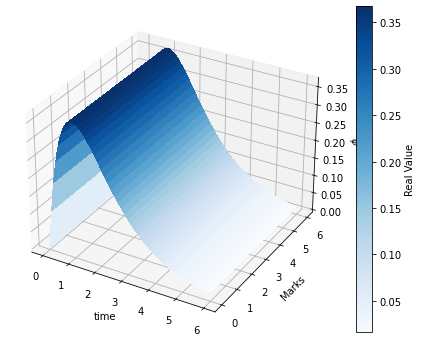

0

In [15]:
def plotKernels(marksLas):
    dx=0.01
    tk = np.arange(0,marksLas,dx)
  
    marks1=np.arange(0,marksLas,dx)
    X, Y = np.meshgrid(tk, marks1)
   
        #y = alpha*np.exp(-beta*tk)
    Z=marks1*function_kernel1(theta,X)
        
            
    
    fig = plt.figure(figsize=(8,6))
 
  
    ax = plt.axes(projection ='3d')
    #ax.plot3D(X,marks1,kernel_value,'r-')
    surf = ax.plot_surface(X, Y, Z, cmap="Blues",
                       linewidth=0, antialiased=False,label="real")
 
    fig.colorbar(surf, label='Real Value')
   
    ax.set_xlabel('time')
    ax.set_ylabel('Marks')
    ax.set_zlabel('$\phi$')
    
    plt.grid()
    plt.pause(0.0005)
     
    return 0

plotKernels(max(marks))


In [109]:
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import norm,multivariate_normal

x1=np.random.normal(loc=0.2,scale=0.2,size=500)
x2=np.random.exponential(scale=0.5,size=500)
x12=[]
for j in range(len(x1)):
    for k in range(len(x2)):
        x12.append(np.array([x1[j],x2[k]]))
gmm=GMM(n_components = 5, max_iter=1000, random_state=10, covariance_type = 'full')
gmm.fit(x12)
weights,means,covarinaces=gmm.weights_,gmm.means_,gmm.covariances_

x1Lim=np.linspace(min(x1),max(x1),2000)
x2Lim=np.linspace(min(x2),max(x2),2000)
x1diff=x1Lim[1]-x1Lim[0]
x2diff=x2Lim[1]-x2Lim[0]
x12Lim=[]
for j in range(len(x1Lim)):
    for k in range(len(x2Lim)):
        x12Lim.append(np.array([x1Lim[j],x2Lim[k]]))
y_axis=np.zeros(len(x12Lim))
for j in range(len(means)):
    y_axis+=multivariate_normal.pdf(x12Lim,means[j],covarinaces[j])*weights[j]





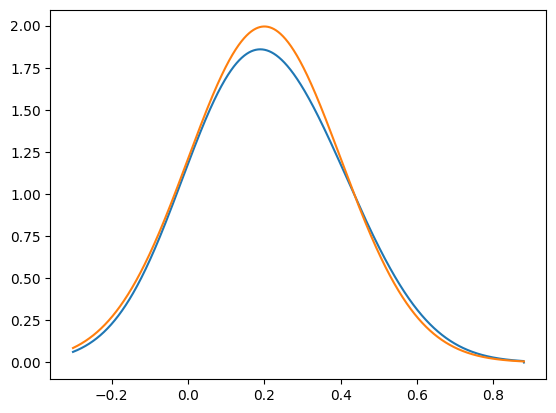

0.0014447808859836065

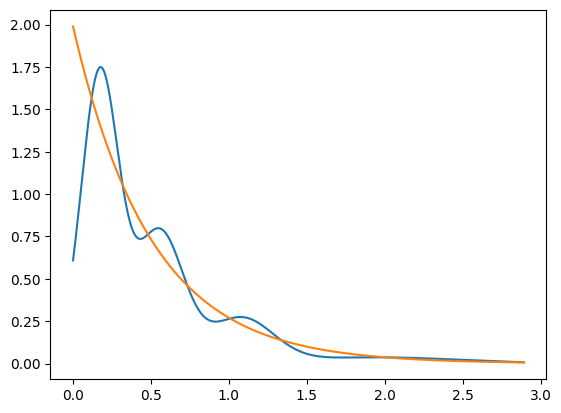

In [110]:

y_x1=np.zeros(len(x1Lim))
y_x2=np.zeros(len(x2Lim))
for j in range(1,len(x1Lim)):
    y_x1[j-1]=(y_axis[(j-1)*len(x2Lim):j*len(x2Lim)]*x2diff).sum()
for j in range(len(x2Lim)):
    y1=0
    for k in range(len(x1Lim)):
        #print(x12Lim[j+k*len(x1)])
        y1+=y_axis[j+k*len(x1Lim)]*x1diff
    y_x2[j]=y1
 
       

    
plt.plot(x1Lim,y_x1)
plt.plot(x1Lim,norm.pdf(x1Lim,loc=0.2,scale=0.2))
plt.show()
plt.plot(x2Lim,y_x2)
plt.plot(x2Lim,1/0.5*(np.exp(-x2Lim*1/0.5)))
x2Lim[2]-x2Lim[1]


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers

alpha = 1
beta = 4





dx=0.1

t = np.arange(0,3,dx)
y = alpha*np.exp(-beta*t)


model =  keras.Sequential()

initializer = keras.initializers.RandomUniform(minval=0, maxval=0.01)
initializer2 = keras.initializers.RandomUniform(minval=0, maxval=0.1)

model.add(layers.Dense(100, input_shape=(1,), activation='relu',kernel_initializer=initializer))

model.add(layers.Dense(1,activation='exponential',kernel_initializer=initializer2))


model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])
model.summary()
weights = model.layers[0].get_weights()
beta_0= weights[0][0]
beta_1 = weights[1][0]

weights = model.layers[1].get_weights()
alpha_0= weights[0][0]
alpha_1 = weights[1][0]
print('Linear regression model is initialized with weights beta_1, beta_0, alpha_0' , (beta_1, beta_0, alpha_0,alpha_1)) 

np.random.seed(3)
model.fit(t, y, epochs=200,batch_size=50,verbose=0)

   

weights = model.layers[0].get_weights()
beta_0= weights[0]
beta_1 = weights[1]

weights = model.layers[1].get_weights()
alpha_0= weights[0]
alpha_1=weights[1]
  
    

print('Linear regression model is trained to have beta_0: , beta_1: , alpha_0:, alpha_1:' , (beta_0, beta_1, alpha_0, alpha_1)) 

predicted = model.predict(t)

plt.plot(t,y,'b--')
plt.plot(t, predicted, 'r--')

plt.show()
weight_relu=beta_0.reshape(-1)
bias_relu=beta_1.reshape(-1)
weight_exp=alpha_0.reshape(-1)
bias_exp=alpha_1.reshape(-1)

In [2]:
!python -m site


sys.path = [
    '/home/jupyter-user10/MarkedHawkes',
    '/opt/tljh/user/lib/python39.zip',
    '/opt/tljh/user/lib/python3.9',
    '/opt/tljh/user/lib/python3.9/lib-dynload',
    '/home/jupyter-user10/.local/lib/python3.9/site-packages',
    '/opt/tljh/user/lib/python3.9/site-packages',
]
USER_BASE: '/home/jupyter-user10/.local' (exists)
USER_SITE: '/home/jupyter-user10/.local/lib/python3.9/site-packages' (exists)
ENABLE_USER_SITE: True
